# Introduction
## In this jupyter notebook we will explore data set which consists of various information about loan company customers. We will build various ML models to automate process of loan approval.

In [1]:
import pandas as pd
data = pd.read_csv('loan_data_set.csv')

In [2]:
print(data.shape)
for column in data:
    print(column)
for column in data:
    print(data[column].shape)

missing_value_count = data.isnull().sum()
print(missing_value_count)

(614, 13)
Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status
(614,)
(614,)
(614,)
(614,)
(614,)
(614,)
(614,)
(614,)
(614,)
(614,)
(614,)
(614,)
(614,)
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


There are 13 variables in dataset, some are catergorical and some are numeric. There are missing values in some columns.

# # First we explore different variables and it's distributions.

Gender
Male      489
Female    112
Name: count, dtype: int64


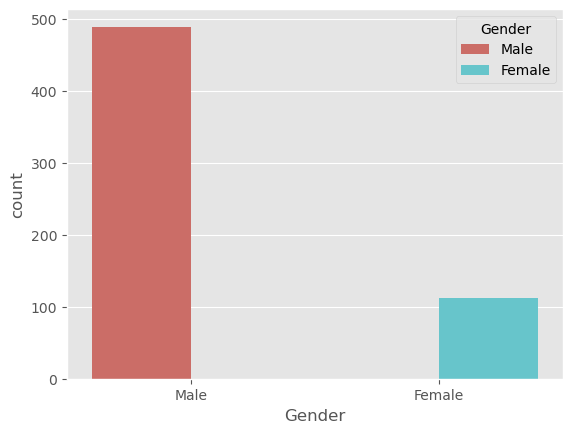

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
print(data['Gender'].value_counts())
sns.countplot(x='Gender',data=data,palette='hls',hue='Gender')
plt.show()

Married
Yes    398
No     213
Name: count, dtype: int64


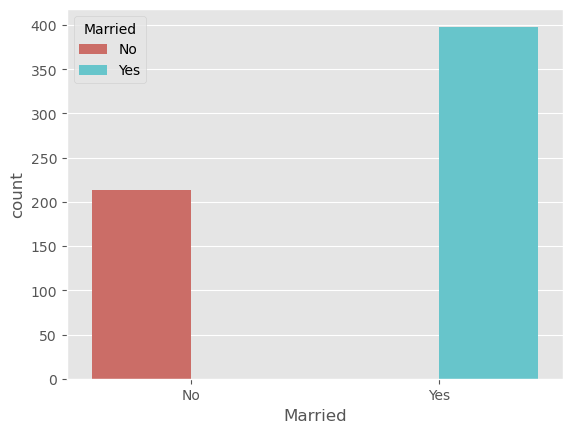

In [4]:
print(data['Married'].value_counts())
sns.countplot(x='Married',data=data,palette='hls',hue='Married')
plt.show()

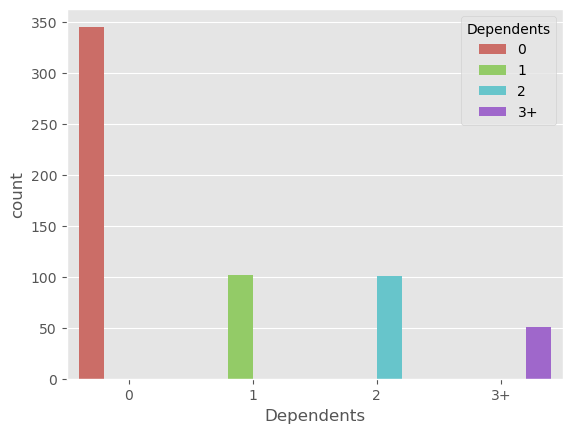

In [5]:

sns.countplot(x='Dependents',data=data,palette='hls',hue='Dependents')
plt.show()

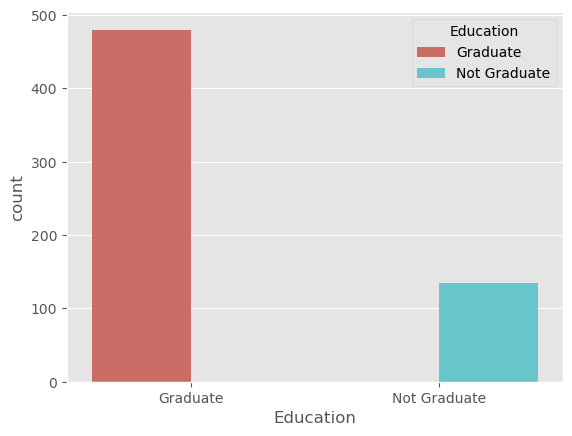

In [6]:
sns.countplot(x='Education',data=data,palette='hls',hue='Education')
plt.show()


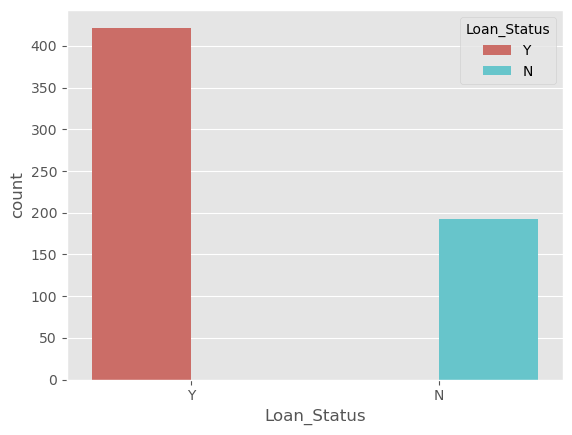

In [7]:
sns.countplot(x='Loan_Status',data=data,palette='hls',hue='Loan_Status')
plt.show()

In [8]:
decisions = data['Loan_Status'].value_counts(dropna=False)
number_of_approved = decisions.iloc[0]
number_of_refused = decisions.iloc[1]
print('percentage of approved loan requests is {:.2f}%'.format(100*number_of_approved/len(data['Loan_Status'])))

percentage of approved loan requests is 68.73%


Now we explore loan duration:

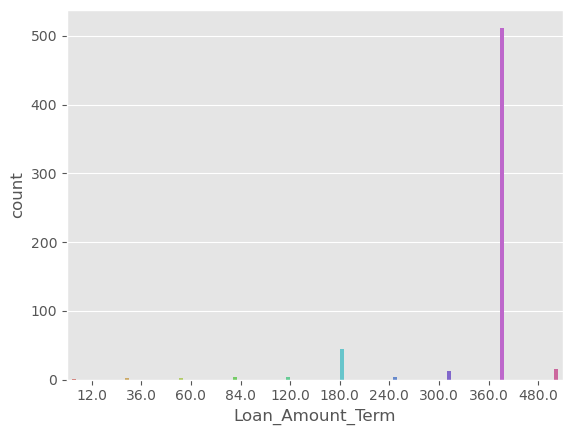

Percentage of loan durationg of 360.0 days is: 85.33%
Percentage of loan durationg of 180.0 days is: 7.33%
Percentage of loan durationg of 480.0 days is: 2.50%
Percentage of loan durationg of 300.0 days is: 2.17%
Percentage of loan durationg of 240.0 days is: 0.67%
Percentage of loan durationg of 84.0 days is: 0.67%
Percentage of loan durationg of 120.0 days is: 0.50%
Percentage of loan durationg of 60.0 days is: 0.33%
Percentage of loan durationg of 36.0 days is: 0.33%
Percentage of loan durationg of 12.0 days is: 0.17%


In [9]:
loan_duration = data['Loan_Amount_Term'].value_counts(dropna=False)
sns.countplot(x='Loan_Amount_Term',data=data, palette='hls',hue='Loan_Amount_Term')
plt.legend([], [], frameon=False)
plt.show()
loan_duration_relative = data['Loan_Amount_Term'].value_counts(normalize=True,dropna=True)
for row in loan_duration_relative.items():
    print(f'Percentage of loan durationg of {row[0]} days is: {(100*row[1]):.2f}%')

Exploring income of applicants and coapplicants:

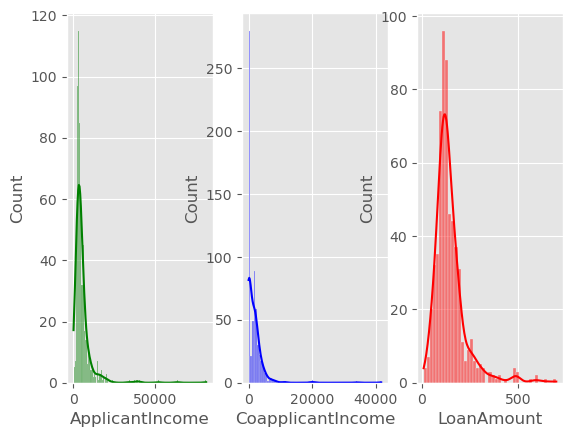

In [10]:
fig,axes = plt.subplots(1,3)
sns.histplot(x='ApplicantIncome',data=data,kde=True,color='green',ax=axes[0])
sns.histplot(x='CoapplicantIncome',data=data,kde=True,color='blue',ax=axes[1])
sns.histplot(x='LoanAmount',data=data,kde=True,color='red',ax=axes[2])
plt.show()

# # Next we prepare our data for training of models:

First we drop Loan_ID from our data set, then use mode() function to fill missing values and finally perform one-hot encoding.

In [11]:
df = data
df.drop(['Loan_ID'],axis = 1, inplace = True)

In [12]:
modes = [df['Gender'].mode()[0],df['Married'].mode()[0],
         df['Dependents'].mode()[0],df['Self_Employed'].mode()[0],
         df['Loan_Amount_Term'].mode()[0],df['Credit_History'].mode()[0]]
means = [df['ApplicantIncome'].mean(),df['CoapplicantIncome'].mean(),df['LoanAmount'].mean()]

df['Gender'].fillna(modes[0],inplace=True)
df['Married'].fillna(modes[1],inplace=True)
df['Dependents'].fillna(modes[2],inplace=True)
df['Self_Employed'].fillna(modes[3],inplace=True)
df['Loan_Amount_Term'].fillna(modes[4],inplace=True)
df['Credit_History'].fillna(modes[5],inplace=True)
df['LoanAmount'].fillna(means[2])
df = pd.get_dummies(data)

Now we check for possible correlation between our variables.

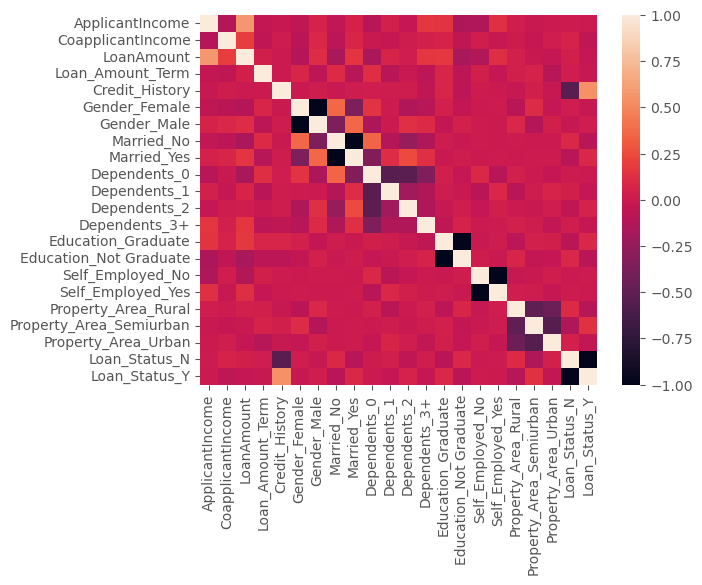

In [13]:
sns.heatmap(df.corr())
plt.show()

There is positive correlation between Loan amount and applicant income.

In [14]:
print(df.columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')


In [15]:
df.drop(['Gender_Female','Married_No','Education_Not Graduate', 'Self_Employed_No','Loan_Status_N'],axis=1,inplace=True)
rename = {'Married_Yes':'Married','Gender_Male':'Gener','Education_Graduate':'Education',
          'Self_Employed_Yes':'Self_Employment','Loan_Status_Y':'Loan_Status'}
df=df.rename(columns=rename)

In [29]:
print(df.columns)
df.fillna(0,inplace=True)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gener', 'Married',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education', 'Self_Employment', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status'],
      dtype='object')


#Training

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

models = {'LogisticRegression':LogisticRegression(random_state=1, max_iter=1000),
    'SVC': SVC(random_state=1),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=1)}

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop(['Loan_Status'],axis = 1)
y = df['Loan_Status']

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

print(sss.split(X,y))
for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

<generator object BaseShuffleSplit.split at 0x000001D9117C4F40>
(491, 16) (123, 16) (491,) (123,)


Now we introduce evaluating functions to track performance of our models.

In [179]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score


def loss (y,y_pred,ret = False):
    pre = precision_score(y,y_pred)
    rec = recall_score(y,y_pred)
    f1 = f1_score(y,y_pred)
    loss = log_loss(y,y_pred)
    acc = accuracy_score(y,y_pred)
    
    if ret:
        return pre,rec,f1,loss,acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))
    

In [180]:
def train_eval(models,X,y):
    for name,model in models.items():
        print(name,':')
        model.fit(X,y)
        loss(y,model.predict(X))
        

In [181]:
train_eval(models,X_train,y_train)

LogisticRegression :
  pre: 0.773
  rec: 0.961
  f1: 0.857
  loss: 7.928
  acc: 0.780
SVC :
  pre: 0.689
  rec: 1.000
  f1: 0.816
  loss: 11.158
  acc: 0.690
DecisionTreeClassifier :
  pre: 0.781
  rec: 0.982
  f1: 0.870
  loss: 7.267
  acc: 0.798


Now we perform cross validation

In [219]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
metrics = ['accuracy','precision','recall','f1']
def cross_val(models):
    cv = []
    for model in models:
        for metric in metrics:
            cv.append([model,metric,"{:.3f}".format(cross_val_score(models[model],X,y,cv=kfold,scoring=metric).mean())])
    return cv

            
cross_val(models)

[['LogisticRegression', 'accuracy', '0.804'],
 ['LogisticRegression', 'precision', '0.791'],
 ['LogisticRegression', 'recall', '0.974'],
 ['LogisticRegression', 'f1', '0.873'],
 ['SVC', 'accuracy', '0.686'],
 ['SVC', 'precision', '0.687'],
 ['SVC', 'recall', '0.995'],
 ['SVC', 'f1', '0.813'],
 ['DecisionTreeClassifier', 'accuracy', '0.809'],
 ['DecisionTreeClassifier', 'precision', '0.791'],
 ['DecisionTreeClassifier', 'recall', '0.983'],
 ['DecisionTreeClassifier', 'f1', '0.877']]

# Improving our models

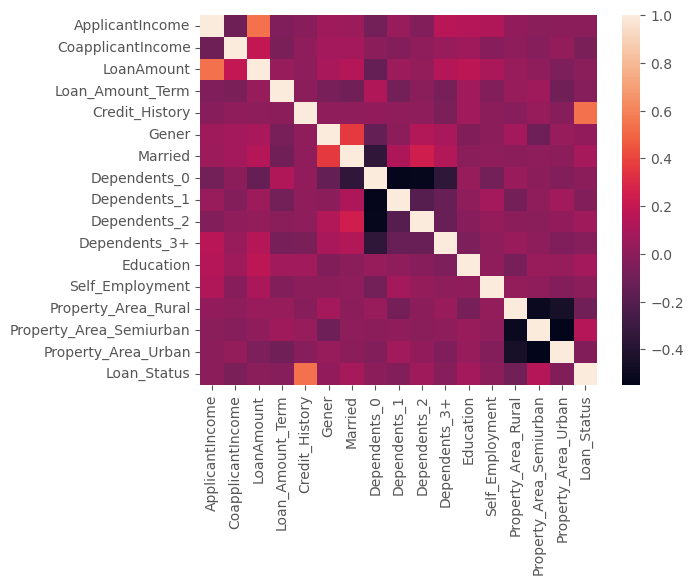

In [220]:
sns.heatmap(df.corr())
plt.show()

0.8536585365853658
